In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

### We are going to be doing most of our work this semester inside of these jupyter-notebooks. But first, we are going to check that all of your software is installed correctly.

Great, now we are going to do some quick python to get you up to speed.
Write a function called squarer which uses a for loop in order to square all of the elements in the list of the input signal.

In [2]:
def squarer(inputsignal):
    pass
print(squarer([0,1,2,3,4,5,6,7]))

None


Now do the same thing using a list comprehension

In [3]:
returned_squarer = []
print(returned_squarer)

[]


# CONTINUE THE EXPLANATION HERE!

Today we are going to examine some basic syntax on what a signal and system are.
The first signal we are concerned with is the impulse (or delta) function:

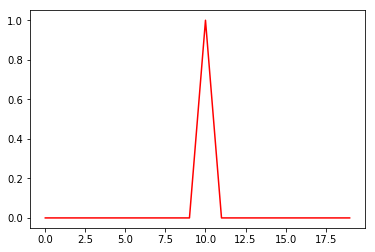

In [4]:
impulse = signal.unit_impulse(20,idx='mid')
plt.plot(impulse,'r')
plt.show()

Great, we drew a pretty impulse, but what use is this?
First thing first, impulses are VERY useful for being able to model a general discrete signal.
For sample, consider this simple signal:


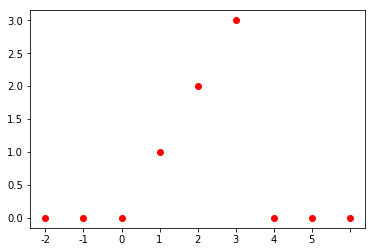

In [5]:
simplesignal = [0,0,0,1,2,3,0,0,0]
plt.figure()
fig, ax = plt.subplots()
plt.plot(simplesignal,'ro')

ax.set_xticklabels(range(-3,len(simplesignal)-3))
plt.show()

For this simple signal we could use the following notation to represent it:
$$\delta[n-1] + 2\delta[n-2] + 3\delta[n-3]$$

As a matter of fact, all discrete signals can be represented of the form:
$$ \text{signal} = \sum_{i=\infty}^{\infty}a_{i}\delta[n-i]$$

The next signal we are going to consider is the unit step function, which looks like this:

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


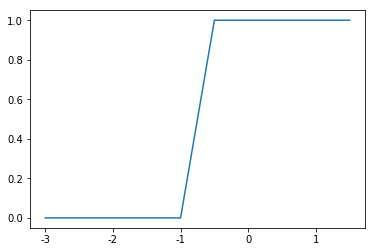

In [6]:
impulse = [1 if x >= 0 else 0  for x in range(-5,5)]
print impulse
plt.figure()
fig, ax = plt.subplots()
plt.plot(impulse)
ax.set_xticklabels(range(-4,len(impulse)-4))
plt.show()

YAY! We are learning about some types of signals. But honestly, what can I do with these?
First things first: We can do signal processing! This is the process of taking signals and modifying them in some way. It can be anything really, adding a filter on instagram, bluring an image, removing noise from something while in lab. Most anything in a research setting needs some signal processing.
Second (what we will look at today): Considering how do systems interact with signals?

So first, let's look at how we represent systems:

We will be dealing with Linear - Time Invarient Systems. 
Linearity means the following:
$$ f(a) + f(b) = f(a+b) $$

Time Invarience means this:
$$ (x[n] \text{ results in  } y[n]) \text{  implies  } (x[n+k] \text{  result in  } y[n+k]) $$

Why do we care about these? Well they just illustrate two properties of easy to model systems. If we have a system and I put two inputs into it, I hope that the output is the same as of I put the inputs in seperatly and summed the responses. Time invarience says that the system doesn't care when I put the signal in (this is VERY reasonable for almost all systems).

So, we are going to call all LTI systems LTI since we will use these A LOT!

So, suppose we have a system of the form:
$$ y[n] = x[n] + 3x[n-1]$$.
We would use the following code to model it's impulse response (PLEASE DO DERIVATION OF IMPULSE RESPONSE ON PAPER TO GAIN INTUITION!)

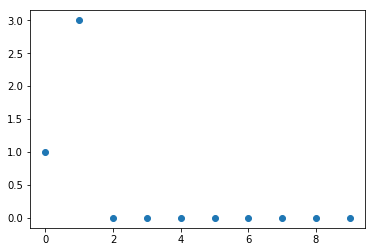

In [7]:
xs = [1,3,0]
ys = [1,0,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dimpulse(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

AWESOME! So the impulse response looks how we think it should look :D
Now, this was with the case with the ouput (y[n]) only depending upon inputs (x[n] etc).
What if we throw another y[n] in there?
(Make a guess).

This is the output for the system
$$y[n] - y[n-1] = x[n] + x[n-1]$$

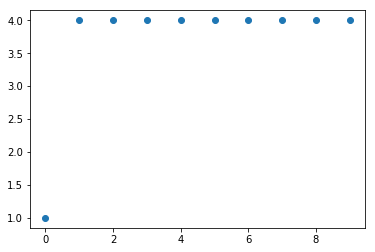

In [8]:
xs = [1,3,0]
ys = [1,-1,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dimpulse(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

Why does this output settle at 4? Think about what the interaction between $y[n]$ and $y[n-1]$ is.

Consider the below system. You have a slider for tweaking r in the input.
The system looks like this:
$ y[n] + y[n-1] = x[n] + rx[n-1]$.

In [9]:
def generateFunSystemResponse(r):
    xs = [1,r,0]
    ys = [1,1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dimpulse(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(generateFunSystemResponse, r=(-1.0,1.0));

interactive(children=(FloatSlider(value=0.0, description=u'r', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

We must also look at a step response and consider what it looks like.
Let's look at the step response of the following system:
#DO THIS PART SLUDES

In [10]:
def generateFunSystemResponse(r):
    xs = [1,r,0]
    ys = [1,1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(generateFunSystemResponse, r=(-1.0,1.0));

interactive(children=(FloatSlider(value=0.0, description=u'r', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

Cool! We now have some analysis tools that we can use. 
Let's do some modeling in order to use them on real systems.
First part, we are going to consider a heating system.
Now, heating systems often have some kind of thermal mass, $$M$$ and some loss $$R$$
We are going to model the system using the equation:
$$T_{Heater}[n] =  T_{Room}[n] + R \times M \times \frac{d T_{Room}[n]}{dt}$$
To figure out where this equation comes from, remember from thermo that Heat in = Heat out + Heat stored.

Finish the below function to find the impulse and step function of this model using $$R=1,M=5$$. What is a derivative in discrete time?

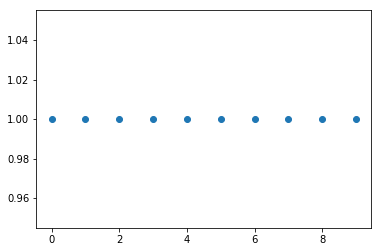

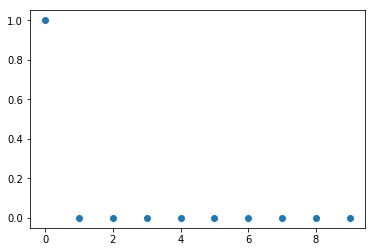

In [11]:
def generateFunSystemResponse(R=1,M=5):
    xs = [1]
    ys = [1]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    iout,iyout = signal.dimpulse(sys)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    plt.figure()
    plt.plot(iout[0:10],iyout[0][0:10],'o')
    plt.show()
    
generateFunSystemResponse()

Solve the differential equation for continuous time. Does this match what the differential equation tells you for continuous time step and impulse response? Write the continious time impulse and step response equations here $$\text{impulse response equation}$$
$$\text{step response equation}$$